***`Feature Selection - 1`***

What is Feature Selection? <br>

Feature means input column. <br>
Feature selection means using subset of Features from given data and using that subset try to predict the target feature, this process is known as Feature Selection. <br>
Why <br>
1. Curse Of dimensionality(feature). because of sparsity
2. Computational Complexity reduce.
3. Interpretability. 

Types of Feature Selection. <br>
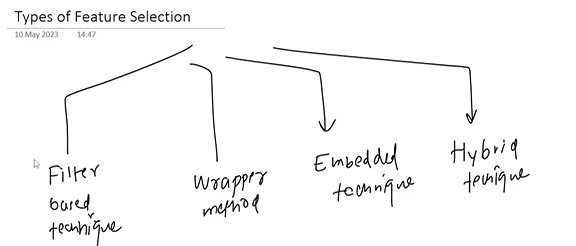

1. Filter Based Feature Selection Technique
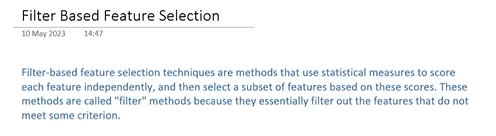

Methods for Filter based FS.

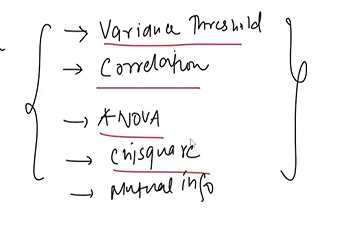

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(7352, 563)

In [4]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

1. Duplicate Features Delete that.

In [5]:
df.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2614,0.288916,-0.023262,-0.040368,-0.956177,-0.951747,-0.914998,-0.959771,-0.960871,-0.905442,-0.865204,...,-0.556260,-0.045148,0.006597,0.102499,-0.009385,0.324227,-0.774702,-0.121216,15,LAYING
2161,0.245656,-0.018412,-0.103194,-0.338830,0.131147,-0.540727,-0.358073,0.183080,-0.552036,-0.342957,...,-0.803069,0.732121,0.721546,0.457377,0.429515,-0.792894,0.229621,-0.040693,11,WALKING
27,0.144504,0.189263,0.062769,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,...,-0.241781,0.013526,0.043354,0.021485,0.046689,-0.667085,0.054216,-0.218875,1,SITTING
3578,0.208794,-0.063126,-0.179805,-0.212891,0.099899,-0.399076,-0.259415,0.080217,-0.419048,-0.072720,...,-0.860714,0.004627,-0.241544,-0.715355,0.430747,-0.582097,0.349905,0.158601,17,WALKING_UPSTAIRS
6929,0.410324,0.012093,-0.132886,0.261567,-0.223417,-0.096356,0.227962,-0.282375,-0.111569,0.417666,...,-0.733645,-0.584719,-0.613965,-0.888369,-0.151600,-0.912736,0.138436,-0.029765,29,WALKING_DOWNSTAIRS


In [34]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop('Activity',axis=1)
y = df['Activity']

le = LabelEncoder()
y = le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

In [10]:
y

array([2, 2, 2, ..., 5, 5, 5], shape=(7352,))

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train,y_train)

c:\Users\ankit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test)
ac = accuracy_score(y_test,y_pred)

In [12]:
ac

0.9748470428280082

In [13]:
# Removing Duplicate Columns

def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns


In [15]:
duplicate_columns = get_duplicate_columns(X_train)

In [16]:
# in duplicaed will keep the keys and delete the duplicated one
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

In [17]:
X_test.shape

(1471, 541)

2. Variance Threshold methods.
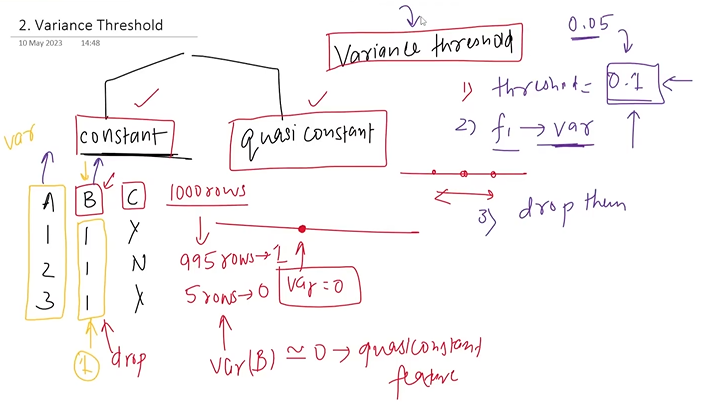

In [18]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [19]:
sel.fit(X_train)

,threshold,0.05


In [22]:
sel.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
columns = X_train.columns[sel.get_support()] #columns having more than threshold value

In [33]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

c:\Users\ankit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but VarianceThreshold was fitted with feature names
  warnings.warn(


ValueError: X has 351 features, but VarianceThreshold is expecting 541 features as input.

### Points before applying Varience Threshold.
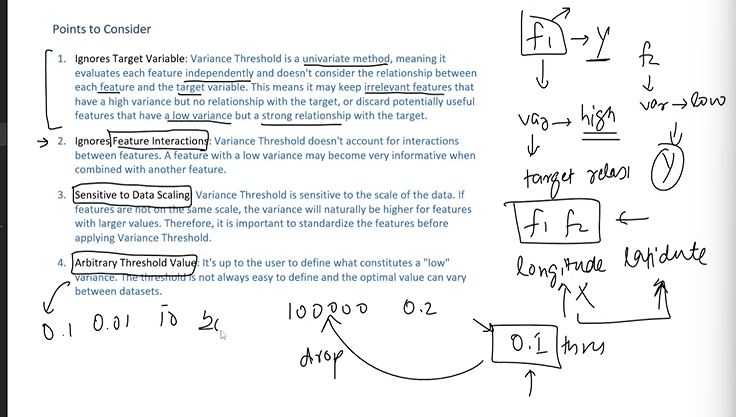

2. Correlation methods.
Pearson Correlation Coefficient.

Here this process try to reduce multicoolinearity.
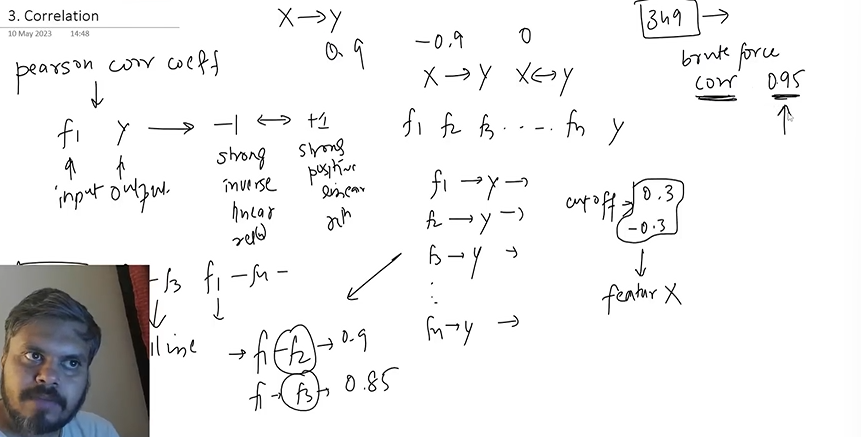

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
X_train

array([[-9.9722288e-01, -9.8464778e-01, -9.7798164e-01, ...,
         3.3497467e-01,  1.0255951e-01,  1.7000000e+01],
       [-3.4263253e-01, -2.6553433e-02, -5.4005268e-01, ...,
         1.2993329e-01,  3.4815076e-02,  5.0000000e+00],
       [-9.9222365e-01, -9.3711304e-01, -9.6419995e-01, ...,
        -2.2630984e-01, -7.2211328e-01,  1.6000000e+01],
       ...,
       [-8.3791027e-01, -8.9255958e-01, -9.2218917e-01, ...,
        -3.6976783e-01, -6.4239531e-01,  2.7000000e+01],
       [-9.8331607e-01, -9.7630947e-01, -9.8714478e-01, ...,
        -3.2103191e-01, -6.7584675e-01,  2.8000000e+01],
       [ 1.1989047e-01, -3.2427951e-01, -1.5158128e-02, ...,
         1.2331857e-01,  1.9916269e-01,  1.7000000e+01]],
      shape=(5881, 351))

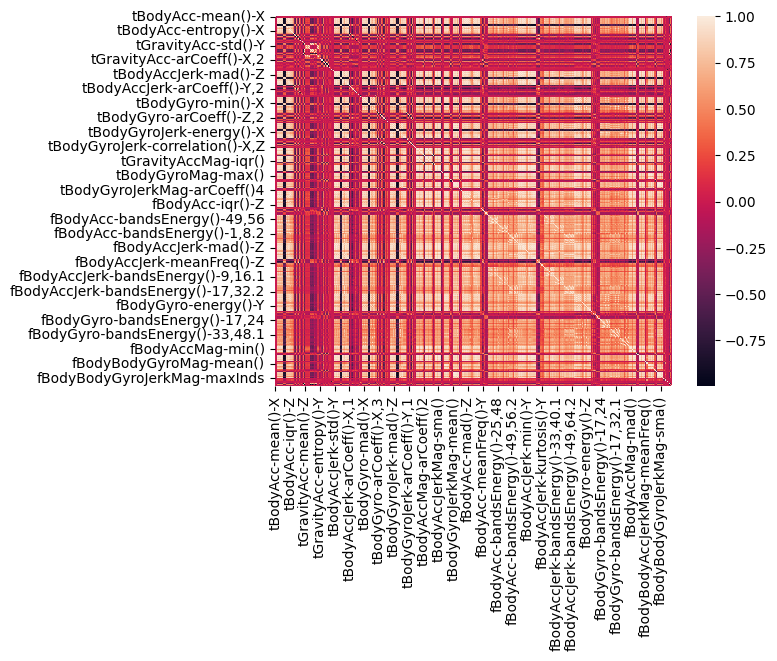

In [36]:
plt.Figure(figsize=(1000,800))
sns.heatmap(X_train.corr())
plt.show()

In [37]:
corr_matrix = X_train.corr()

In [38]:
# get the column names of the df
columns = corr_matrix.columns

#create an emplty list to keep track of columns to drop
columns_to_drop = []

#loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        #acces the cell of the df
        if corr_matrix.loc[columns[i],columns[j]]>0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

2188


In [39]:
columns_to_drop = set(columns_to_drop)

In [41]:
len(columns_to_drop)

292

In [42]:
X_train.drop(columns=columns_to_drop,axis=1,inplace=True)
X_test.drop(columns=columns_to_drop,axis=1,inplace=True)

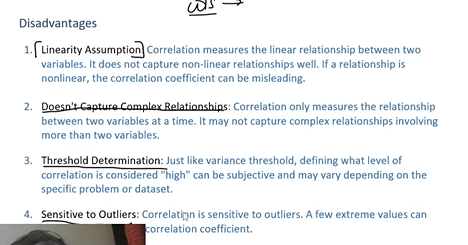

4. Annova

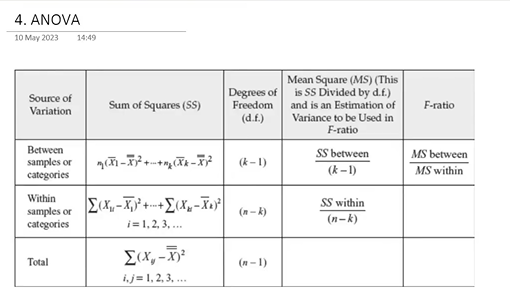

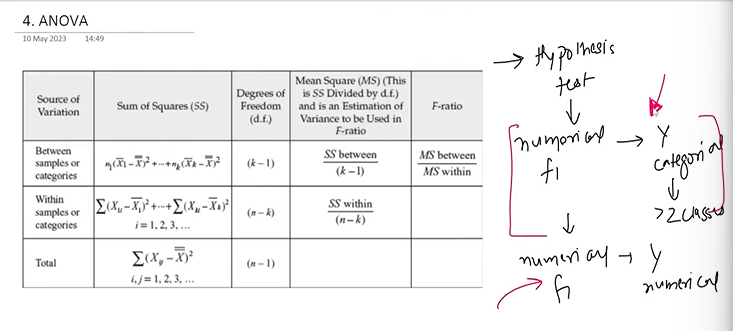

input column is numerical, and output column is categorical then---

n=rows, k=categories, <br>
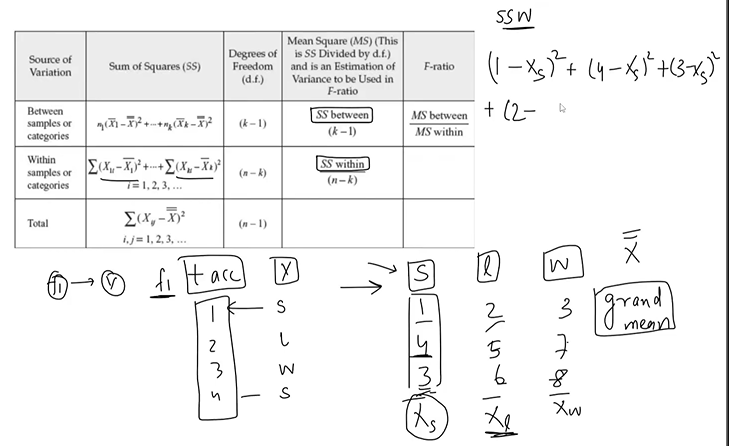

In [ ]:
# anova using sklearn
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif,k=100).fit(X_train,y_train)

#display selected feature names
X_train.columns[sel.get_support()]

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)



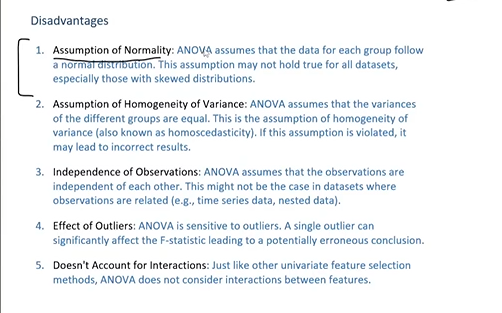

### X2 test
needs both categorical features in dataset.
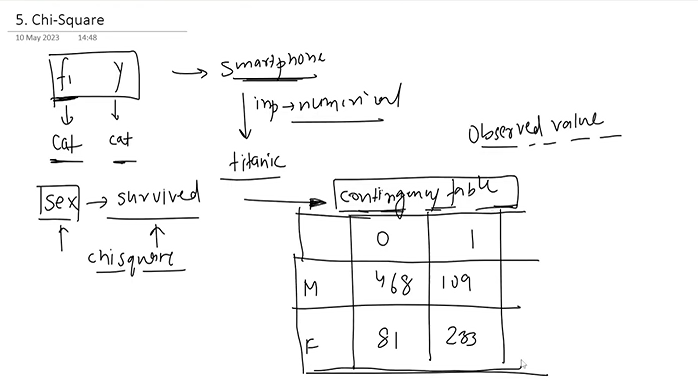

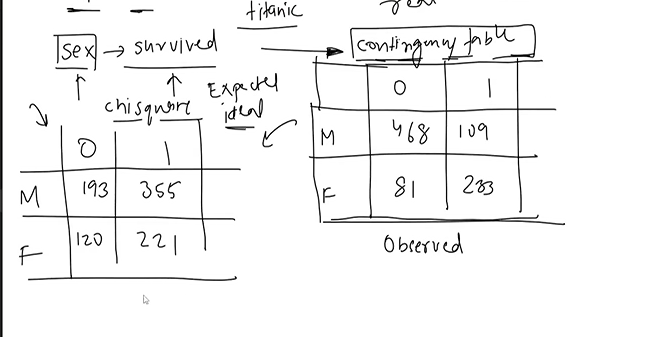

check for difference between actual and expected table, iff diff is crazy then there is a relationship.
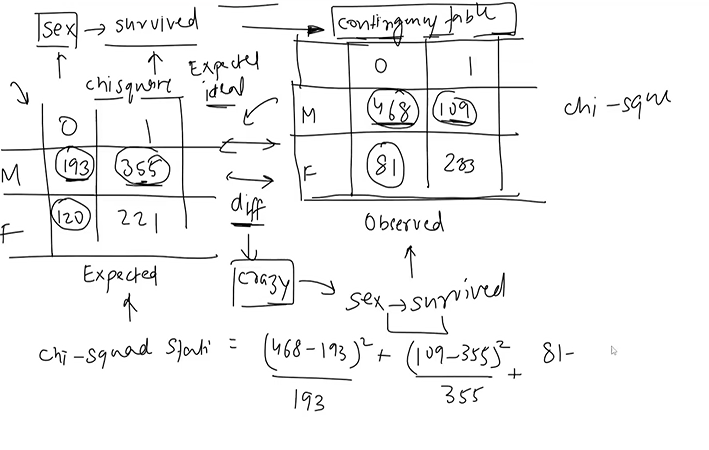

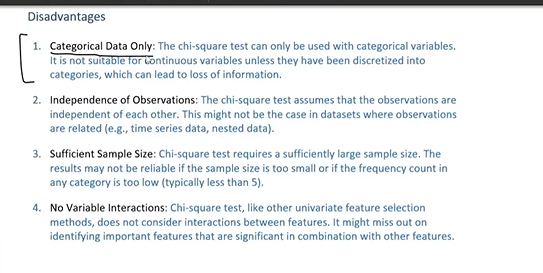

In [ ]:
# inbuilt function
from scipy.stats import chi2_contingency
chi2_contingency(ct)#ct is cross tab means expected matrix

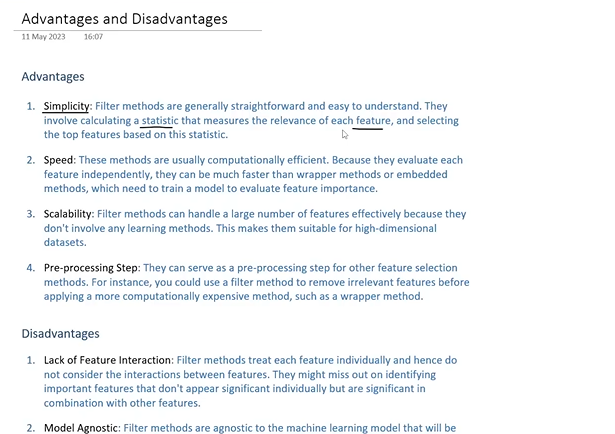

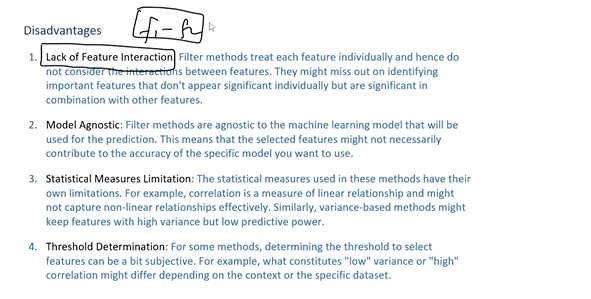